# Part 3: Modelling

If you run all the code in the notebook, make sure to do it cell-by-cell, as the graphs in one of the last cells will disappear unless you find the correct answer.

Let's first reload the dataset we obtained after pre-processing and transformation:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('CS_transformed_data.csv', index_col=0)
print(dataset.head())

   Occupation  Marital_Status  Purchase_Sum  annual_income  \
0    0.288734               0     -0.452944      -0.434067   
1    1.233680               0     -0.467259      -0.275620   
2    1.076189               0     -0.345577      -0.457494   
3   -0.183740               1     -0.183788      -0.082992   
4    1.863644               1     -0.338420      -0.025106   

   number_of_children  proximity_town    sum  Age_18-25  Age_26-35  Age_36-45  \
0            1.050259       -0.797397  38891          0          0          0   
1           -0.982428       -0.750248  37417          0          0          0   
2            0.033916       -0.731928  49947          0          1          0   
3           -0.982428       -0.796079  66607          0          0          0   
4            0.033916       -0.788903  50684          0          1          0   

   ...  Age_51-55  Age_55+  Gender_M  City_Category_B  City_Category_C  \
0  ...          0        0         0                0             

## Model

While this is not standard pratice, we are going to model the relationship of independent variables with the dependent variable separately. Given that the other variables are categorical, we will stick with the truly continuous ones: proximity to town and annual income.
Write a linear regression for both, predicting the total purchase value:

In [3]:
def fit_linear_regression(dataset, variable):
    predictions = []
    
    ### BEGIN SOLUTION  
    # Import the appropriate code
    from sklearn.linear_model import LinearRegression
    
    # Create the correct datasets for modelling
    y = dataset[['Purchase_Sum']]
    X = dataset[[variable]]
    
    # Create a LinearRegression instance and use it to fit and predict the data
    lin_r = LinearRegression()
    lin_r.fit(X, y)
    predictions = lin_r.predict(X)
    ### END SOLUTION
    
    return predictions

Your answer will be verified below (no need for you to do anything).

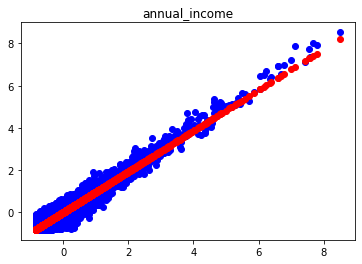

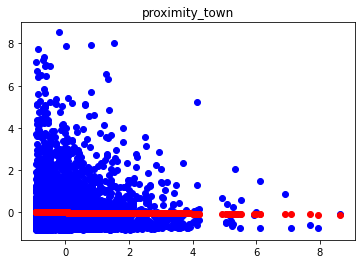

In [4]:
### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
from sklearn.linear_model import LinearRegression
lin_r = LinearRegression()

y = dataset[['Purchase_Sum']]

lin_r.fit(dataset[['proximity_town']], y)
predictions_town = lin_r.predict(dataset[['proximity_town']])

lin_r.fit(dataset[['annual_income']], y)
predictions_ai = lin_r.predict(dataset[['annual_income']])

assert np.array_equal(predictions_ai, fit_linear_regression(dataset, 'annual_income'))
assert np.array_equal(predictions_town, fit_linear_regression(dataset, 'proximity_town'))

plt.title('annual_income')
plt.scatter(dataset[['annual_income']], dataset[['Purchase_Sum']], color = 'blue')
plt.scatter(dataset[['annual_income']], predictions_ai, color = 'red')
plt.show()

plt.title('proximity_town')
plt.scatter(dataset[['proximity_town']], dataset[['Purchase_Sum']], color = 'blue')
plt.scatter(dataset[['proximity_town']], predictions_town, color = 'red')
plt.show()
### END HIDDEN TESTS

## Evaluation

For now, let's stick to a qualitative evaluation: by looking at the graphs.
Clearly, it seems we can easily use the annual income to predict the purchase sum. The relationship is almost perfectly linear.
The proximity to town is too scattered, and the linear regression is returned as a flat curve.
Even without quantifying this, we can see the quality of both results.